# Exponential Smoothing

In [ ]:
# In pandas, just done in the simple one line of code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [ ]:
# initializing Parameters
start = "2020-01-01"
end = "2022-05-31"
symbols = ["RELIANCE.NS"]

# Get data
data = yf.download(symbols, start, end)

[*********************100%%**********************]  1 of 1 completed


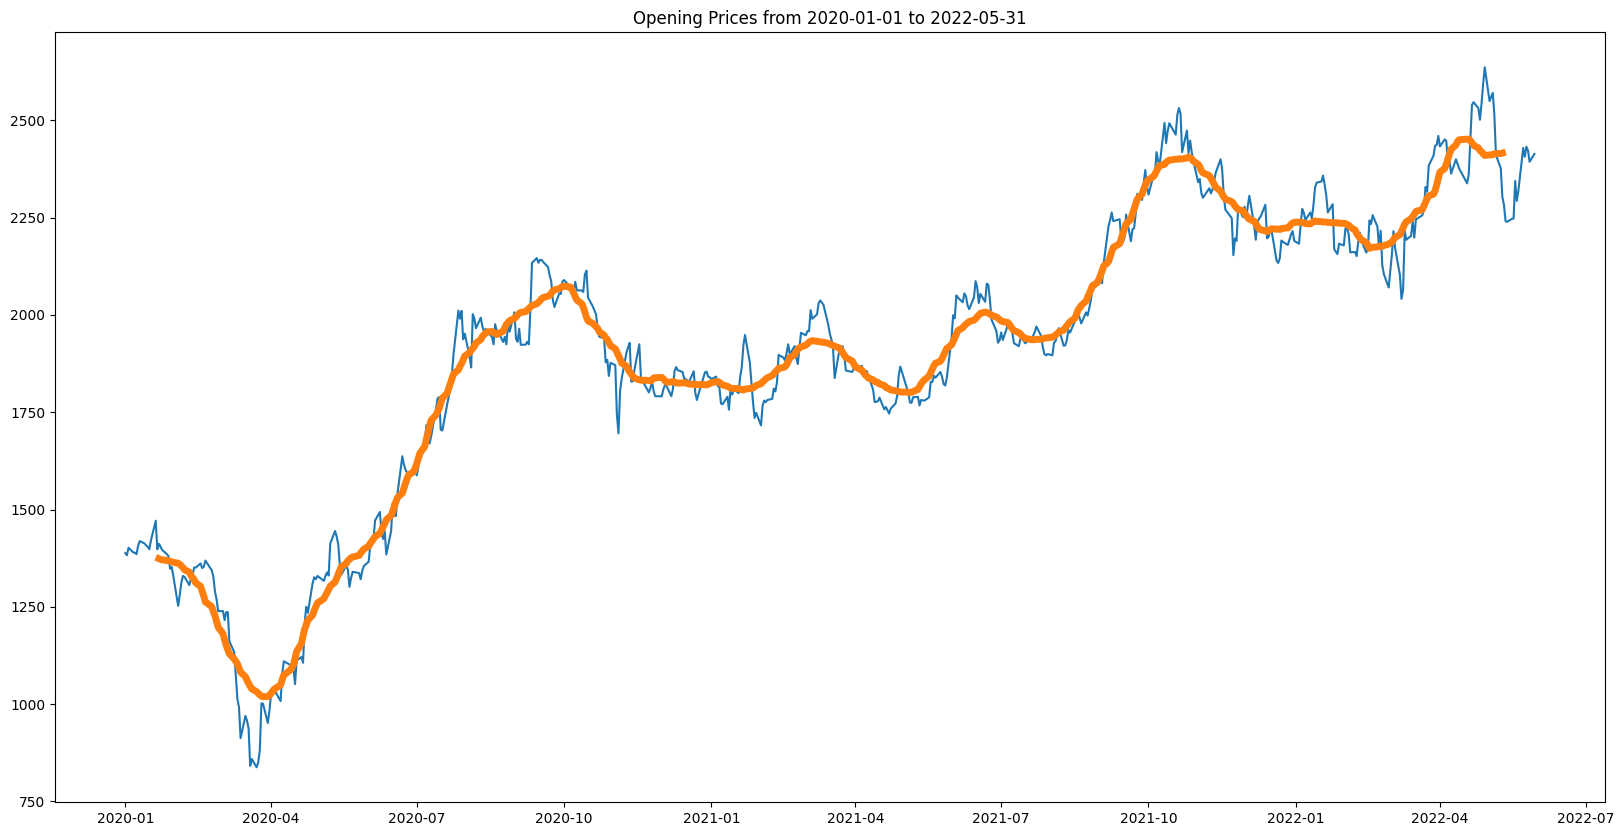

In [ ]:
# Display
plt.figure(figsize=(20, 10))
plt.title('Opening Prices from {} to {}'.format(start, end))
plt.plot(data['Open'])
plt.plot(data['Open'].rolling(30, center=True).mean(), lw=5) # Single line of code

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/sp500_close.csv", index_col=0, parse_dates=True)
df.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


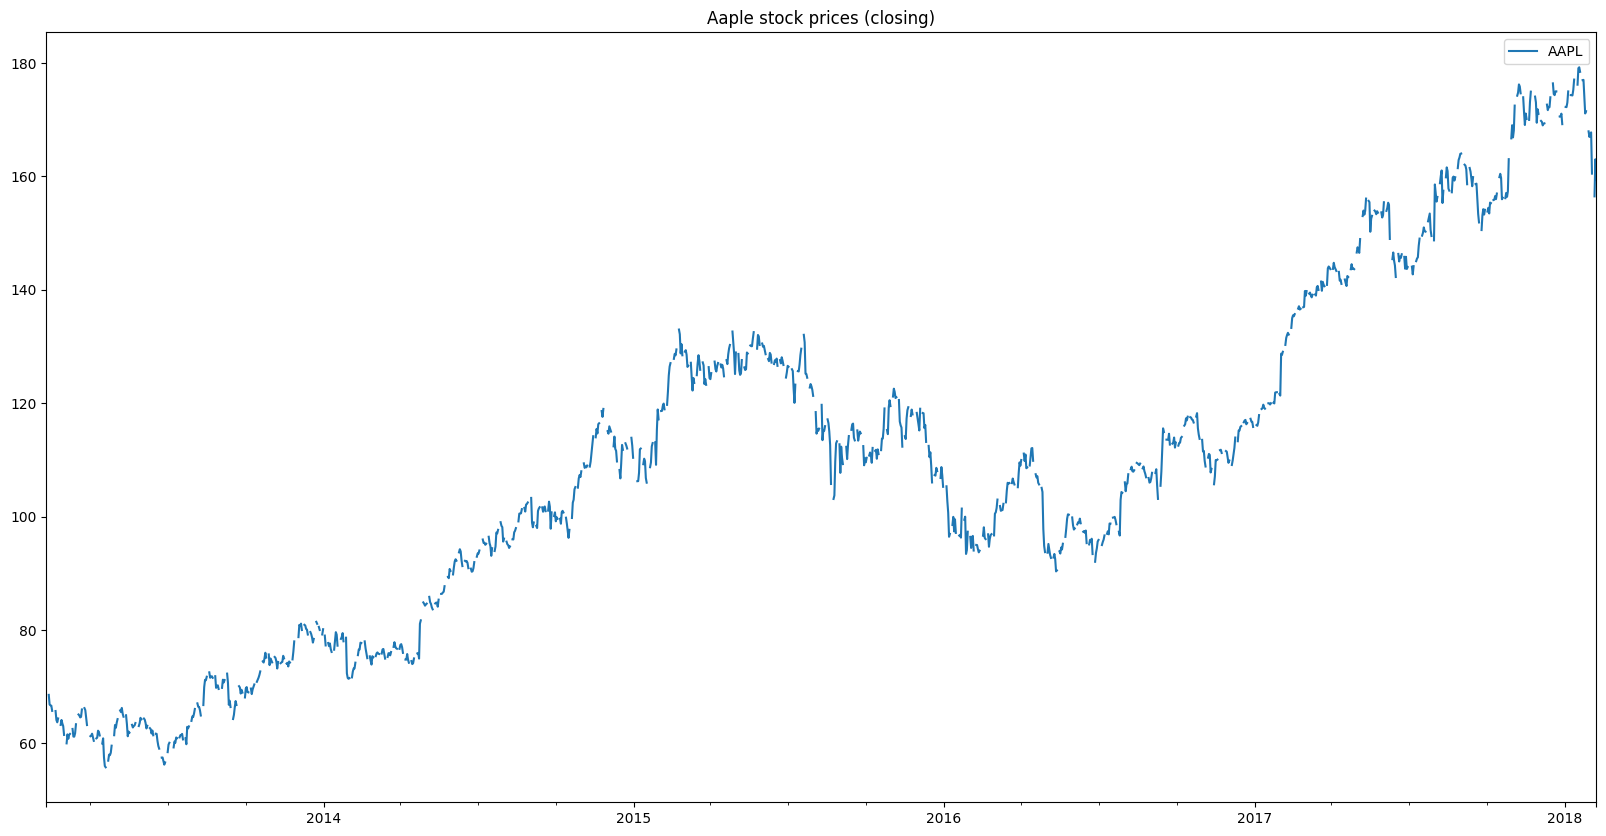

In [ ]:
aaple = df[["AAPL"]]
aaple.plot(figsize=(20, 10))
plt.title("Aaple stock prices (closing)");

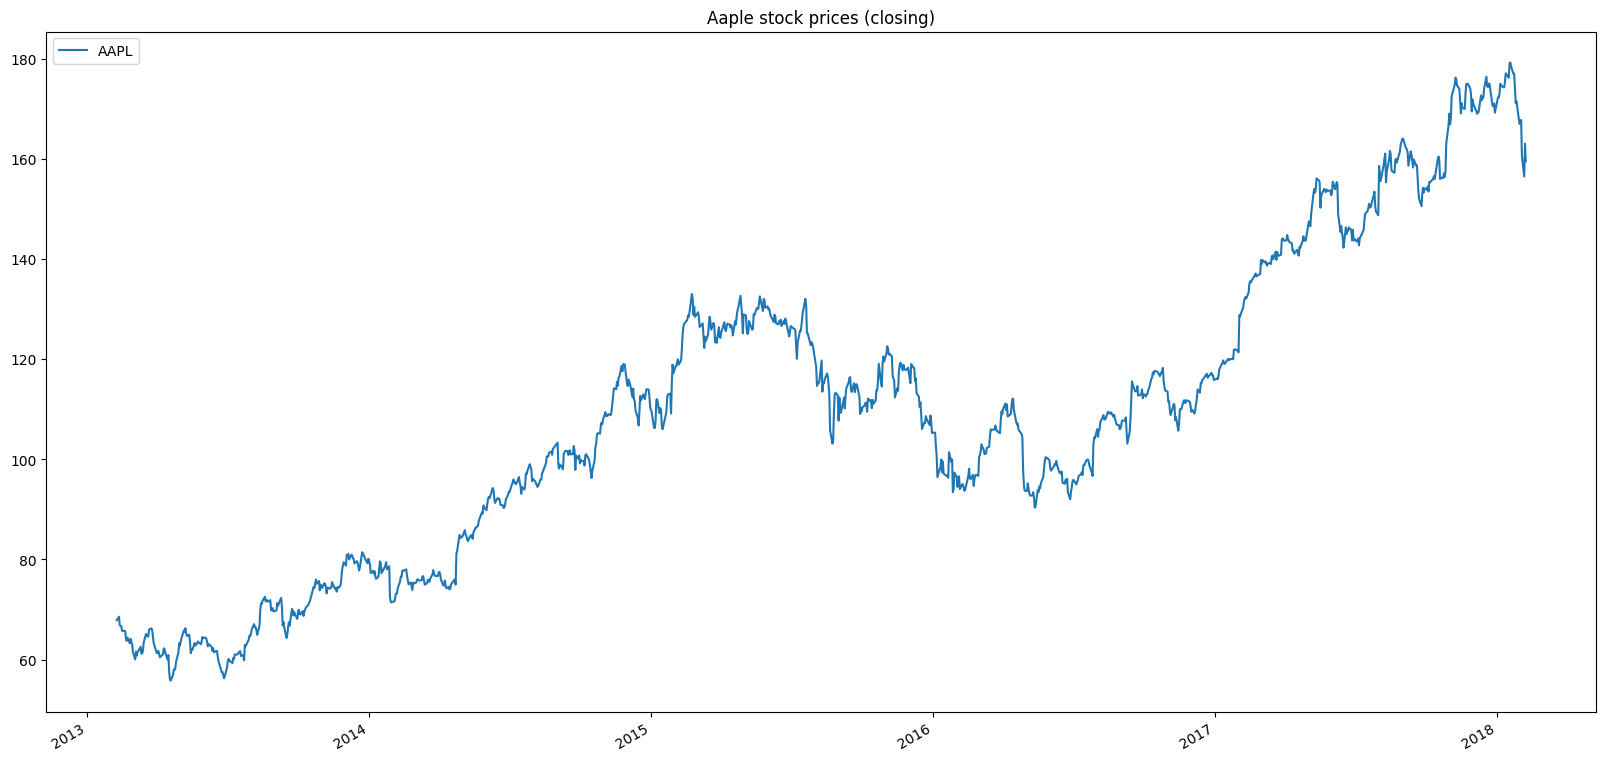

In [ ]:
# Handling missing data
aaple = aaple.dropna()
aaple.plot(figsize=(20, 10))
plt.title("Aaple stock prices (closing)");

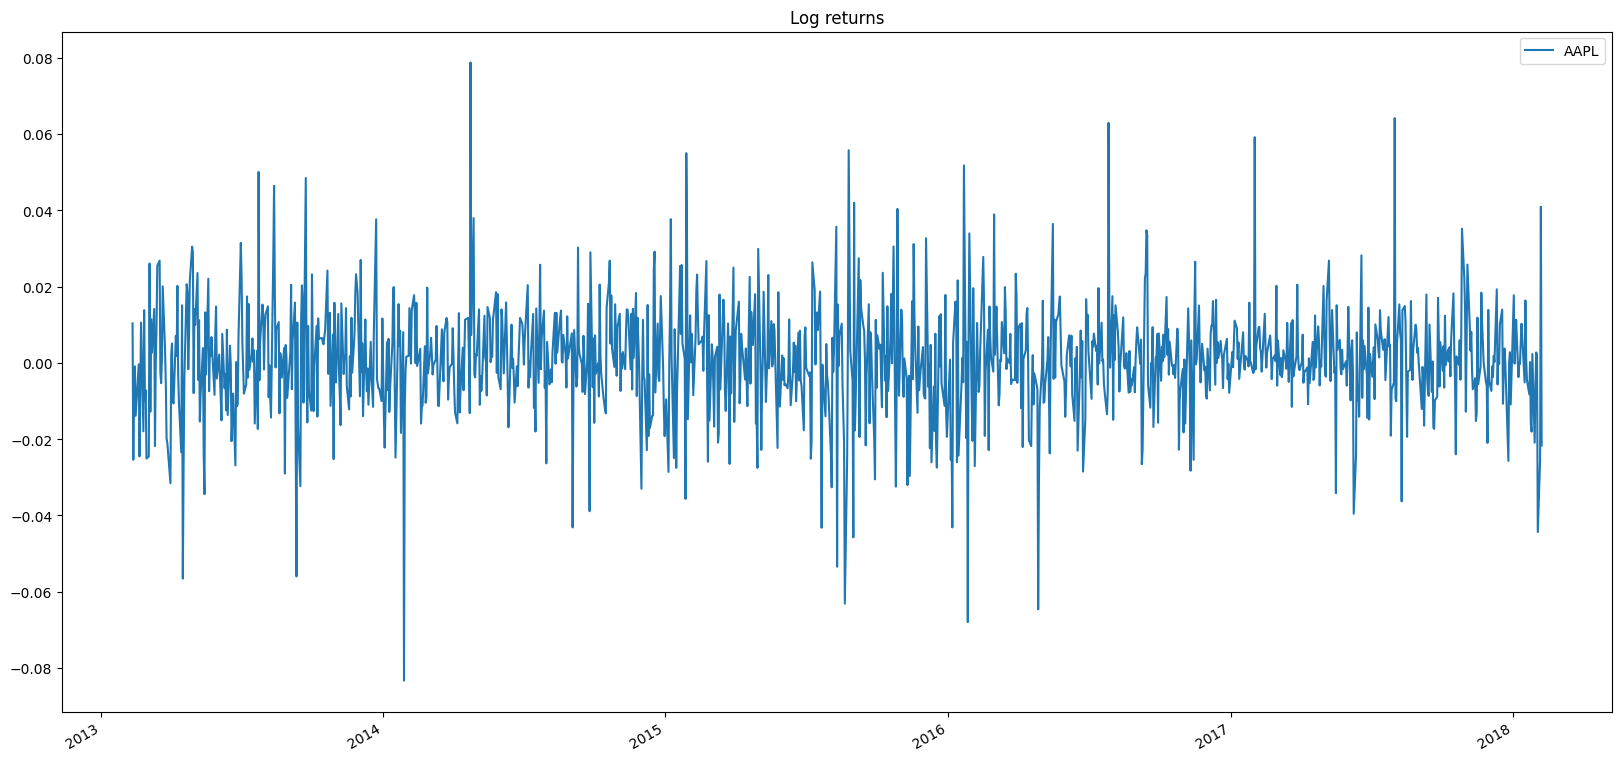

In [ ]:
# Log return
np.log(aaple.pct_change() + 1).plot(figsize=(20, 10))
plt.title("Log returns");

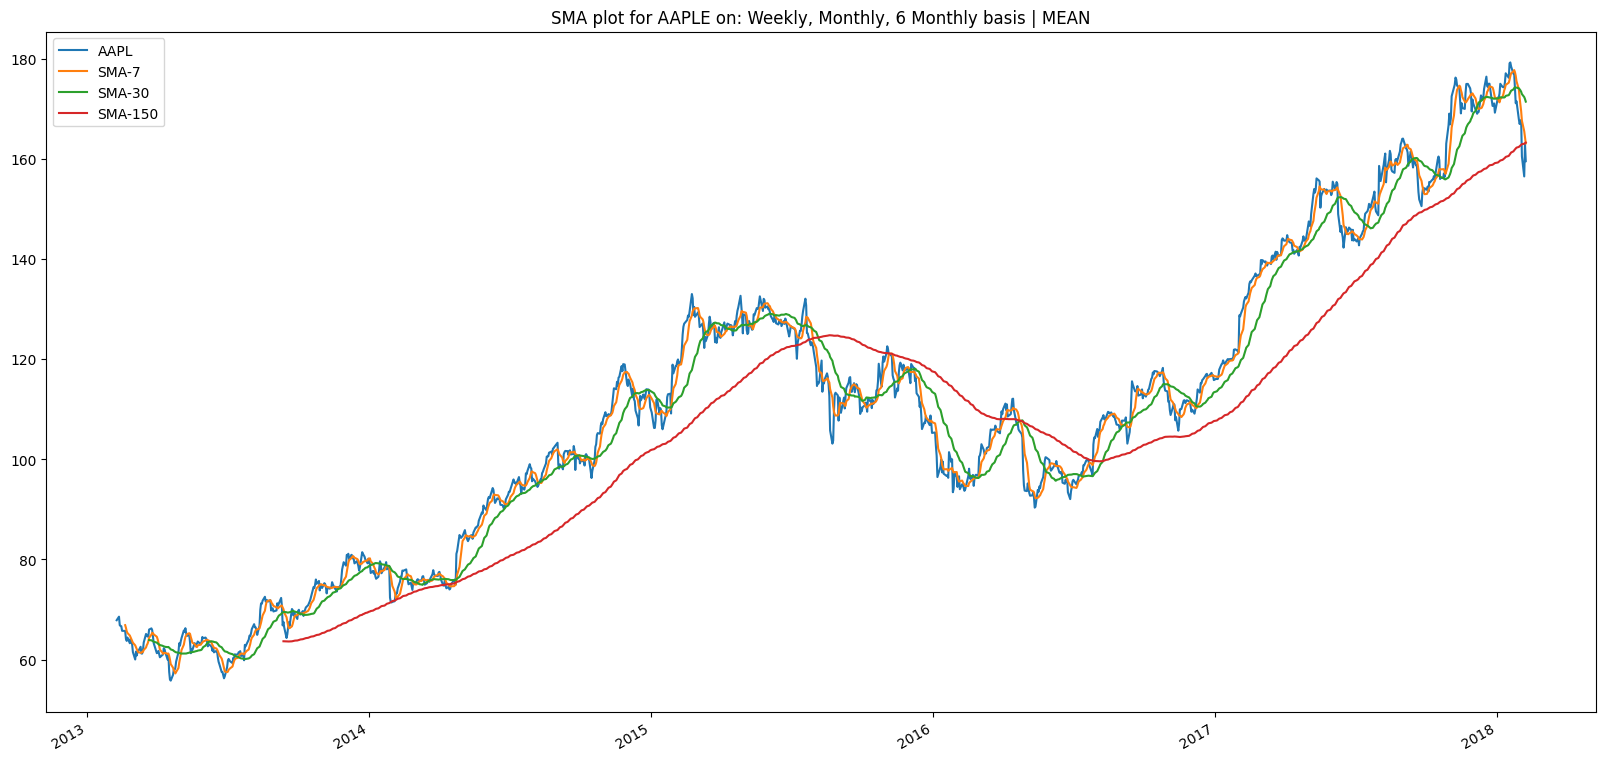

In [ ]:
# Moving average
aaple["SMA-7"] = aaple["AAPL"].rolling(7).mean()
aaple["SMA-30"] = aaple["AAPL"].rolling(30).mean()
aaple["SMA-150"] = aaple["AAPL"].rolling(150).mean()
aaple.plot(figsize=(20, 10))
plt.title("SMA plot for AAPLE on: Weekly, Monthly, 6 Monthly basis | MEAN");

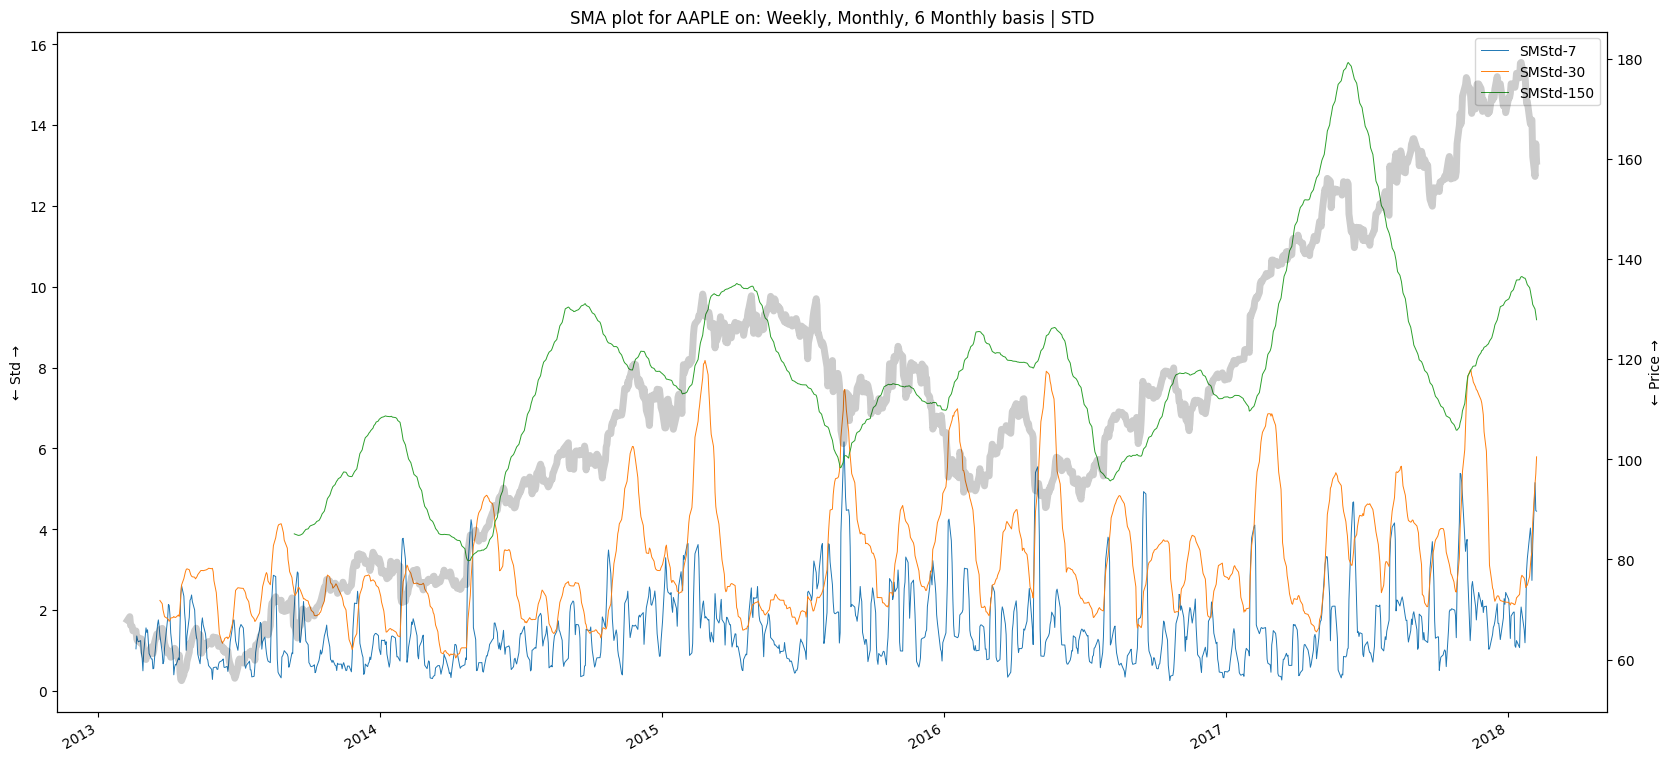

In [ ]:
#The lagging thing is here.
#Which means, the SMA lags behind the real values — the bigger the window size it, the more lagging effect will be.
#Lagging means: "Delay".
#We can also achieve it by .shift().

aaple["SMStd-7"] = aaple["AAPL"].rolling(7).std()
aaple["SMStd-30"] = aaple["AAPL"].rolling(30).std()
aaple["SMStd-150"] = aaple["AAPL"].rolling(150).std()
fig, ax1 = plt.subplots()

aaple[["SMStd-7", "SMStd-30", "SMStd-150"]].plot(figsize=(20, 10), ax=ax1, lw=0.7)
ax1.set_title("SMA plot for AAPLE on: Weekly, Monthly, 6 Monthly basis | STD");
ax1.set_ylabel("← Std →")

ax2 = ax1.twinx()
aaple["AAPL"].plot(ax=ax2, alpha=0.2, color="black", lw=5)
ax2.set_ylabel("← Price →");

In [ ]:
# Here, just for the sake of functionality we can see the standard deviation based on the window.
# In the back ground with black line, it is the real stock prices
# It is obvious that the bigger the window is, the higher the std tends to be
# In the monthly window, we can see some seasonality effect as the std tends to get higher in some portion of a month
# In the 6 month basis we don't get so much intuative sense but still in the recent times the stock seems to be
# fluctuate more

In [ ]:
# In pandas, just done in the simple one line of code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [ ]:
# initializing Parameters
start = "2020-01-01"
end = "2022-05-31"
symbols = ["RELIANCE.NS"]

# Get data
data = yf.download(symbols, start, end)

[*********************100%%**********************]  1 of 1 completed


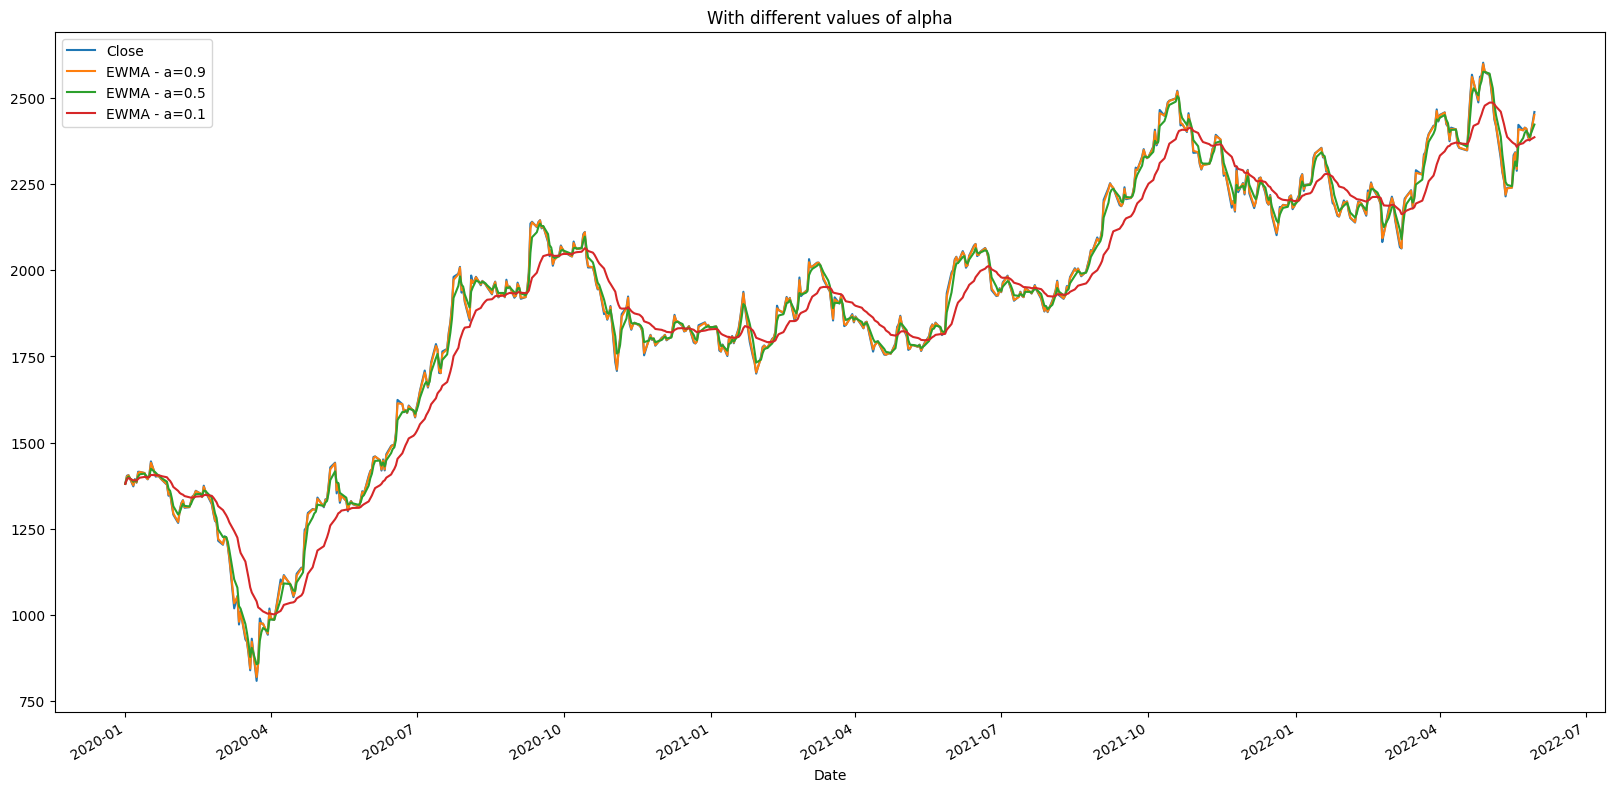

In [ ]:
## EWMA
# data = data.droplevel(1, axis=1)
data = data[["Close"]]

data["EWMA - a=0.9"] = data['Close'].ewm(alpha=0.9).mean()
data["EWMA - a=0.5"] = data['Close'].ewm(alpha=0.5).mean()
data["EWMA - a=0.1"] = data['Close'].ewm(alpha=0.1).mean()

data.plot(figsize=(20, 10))
plt.title("With different values of alpha");

In [ ]:
## EWMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
passengers = pd.read_csv("/content/airline_passengers.csv", index_col=0, parse_dates=True)
passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


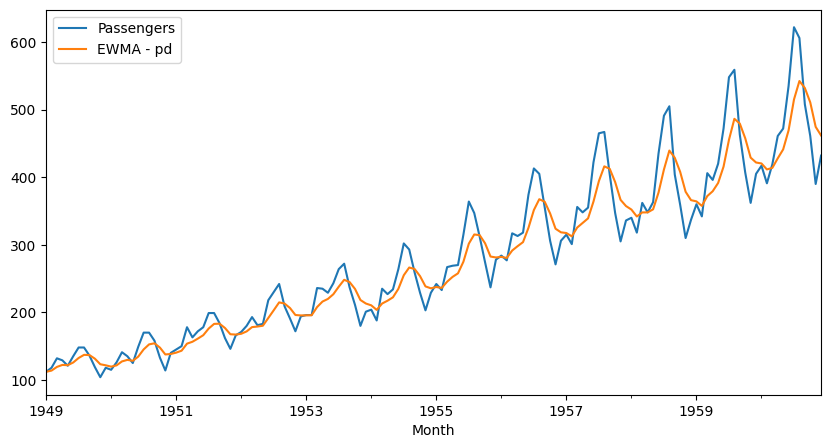

In [ ]:
# Gives less weight to the new points (smoother curve)
alpha = 0.3
passengers["EWMA - pd"] = passengers["Passengers"].ewm(alpha=alpha, adjust=False).mean()
passengers.plot();

The data shows trend — a positive one

The data also shows the seasonal element

The passengers per year per season tends to grow (probably exponentially)

Here the seasonal component constantly amplifies overtime — so it is not a constant seasonal element

There is very little randomness in the dataset (unlike a typical stock data)

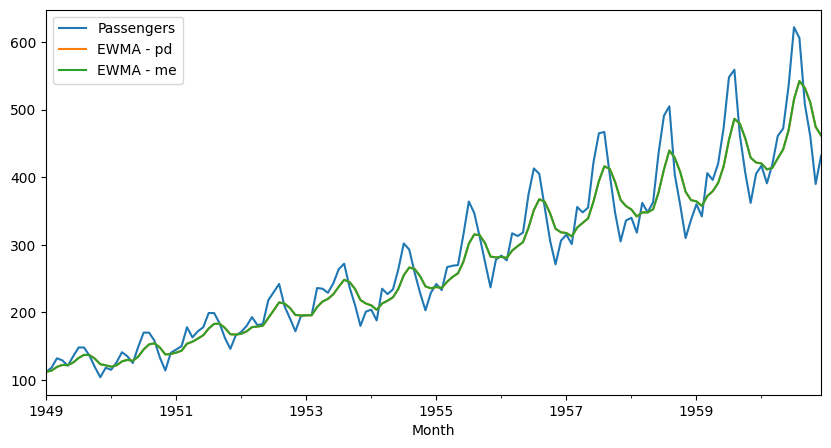

In [ ]:
# Gives less weight to the new points (smoother curve)
alpha = 0.3
EWMeans = []
EWMeans.append(passengers["Passengers"].iloc[0]) # very first value

for x_t in passengers["Passengers"].iloc[1:]:
    new_mean = alpha*x_t + (1 - alpha)*EWMeans[-1]
    EWMeans.append(new_mean)

passengers["EWMA - me"] = EWMeans
passengers.plot();

In [ ]:
passengers.head()

,Passengers,EWMA - pd,EWMA - me
Month,,,
1949-01-01,112,112.0000,112.0000
1949-02-01,118,113.8000,113.8000
1949-03-01,132,119.2600,119.2600
1949-04-01,129,122.1820,122.1820
1949-05-01,121,121.8274,121.8274


## 🎲 SES A Pholosophical Change in Perspective

Before this point in time, we were used to discuss only about the ***ways*** to calculate the moving average. Now, it is the time to **forecast** points.

For that, we will build up from what we have learnt so far *(EWMA)* and **use it instead of** calculating moving average but **to forecast**. That is gonna be awsome — let's do that!

### Using new notations
Till now we have:

# $$ \text{EWMA} = \alpha x_t + (1 - \alpha)\bar x_{t - 1}$$

######

Just a little change as we are ***now forecasting***:

$$ \hat y_t = \alpha y_t + (1 - \alpha)\hat y_{t - 1}$$

######

The ***official*** forecasting model:

$$ \hat y_{t+1 | t} = \alpha y_t + (1 - \alpha)\hat y_{t | t - 1}$$

- $\hat y_{t+1 | t}:$ The "*future predicted*" value of `t + 1` point ***given*** the current point `t`
- $\hat y_{t | t - 1}:$ The "*current predictied*" value of  `t` ***given*** the previous value of `t - 1`

This ↑ one, I know is not clear to me as well at this point in time `t` 😅 but that will get clear as we will move forward.

Express our model **in the component** form:

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t $$
Where, <br>
$h=1,2,3 ...$
<br>Meaning `t + h` th forecast in the future. Recall the `h` value from previous notebooks. `1. Timeseries Basics → 4. Types of tasks → 2.1 Incremental Forecast`

#### 2️⃣ Smoothing Equation
# $$l_t = \alpha y_t + (1 - \alpha)l_{t - 1} $$

Which, <br>
is just the plugging the value of $l_t$ from 2️⃣ equation to the 1️⃣ equation. Might **not** make any sense now but here we are setting **THE LEVEL** which later add some other elements and building such habit will result smoother later.

> **NOTE / NOTICE** that, the original indices are back when we **represent the equation** in the form of the component form ie. instead of writing $l_{t + 1 | t}$ we've just written $l_t$ as before under the section: "*Just a little change as we are now forecasting*" equation in this notebook.

## $l_t$ is the Level.
This is the first time that we have been introduced in the ***jargons*** of the time-series. It is simple for now but then it will be more complex. Don't worry we will get there easily.

The term **level** is first appeared at this path: `2. Exponential Smoothing and ETS → 1. Moving and Exp` where we discussed that the level is the *constant* values around which the value of the time-series fluctuates.

> Thus, **the level** can be thought of as the moving average which represents the mean of the fluctuations in that period.

Here, in thsis simple SES, we will **only be able to predict** the mean fluctuation of the 1 step further in time because the value of `h` 2, 3, 4... will be just the same.

######

## 👨‍💻 Great Goin'
Let's now have a look at some code — and this time we will be using `statsmodels`

#### A Bit of Skeleton With Statsmodels
Till now we have worked with `sklearn` and used fit and predict. Here, the flow changes a bit. Let's have a look.

```python
# Model initialization
model = someModel(param_1=0.1, param_2="euclidean") # sklearn
model = someModel(data) # statsmodels

# Fitting
model.fit(data) # sklearn
model.fit(param_1=0.1, param_2="euclidean") # statsmodels
```
See? Here in `statsmodels` the flow is a bit flipped.

In [ ]:
import importlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This is the model that we are going to work with
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
plt.rcParams["figure.figsize"] = (20, 10)

In [ ]:
passengers = pd.read_csv("/content/airline_passengers.csv", index_col=0, parse_dates=True)

In [ ]:
passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
ses = SimpleExpSmoothing(passengers)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


So, you **see the warnings** right? They are telling that "the model doesn't know that what frequency is there in the data" meaning, is our data spread out monthly? weekly? yearly? 3 yearly? what?

Thus, it *by default* takes the monthly. But in-case of other frequancy that we have in the data, we will need to pass them in the parameter.

In [ ]:
# See that the frequency is NONE
passengers.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
# You can try setting "D", "Y" etc... but that will result an error as it will
# check that `really` the frequancy is there or not, so better to use the  correct one
passengers.index.freq = "MS"

Here `MS` means **Month Start** and the `M` means **Month End**. So, keep that in mind. Or just refer **your** [Time in Pandas](https://github.com/AayushSameerShah/Pandas_Book/tree/main/2.%20Pandas/6.%20TIME) repository!

In [ ]:
# Again need to put the data in to reflect the `freq` change
ses = SimpleExpSmoothing(passengers,
                        initialization_method="legacy-heuristic")

Yeah, we are using the `legacy-heuristic` to make it work same as it did in the old versions.

Remember to **give only 1D data** meaning, there should only be single thing to forecast. As here we only have the passengers as the input and to be the thing to be predicted. Otherwise it will give:
```python
ValueError: endog is required to have ndim 1 but has ndim 2
```

In [ ]:
alpha = 0.2
result = ses.fit(smoothing_level=alpha, optimized=False)
result

The `optimized=False` is because here the $\alpha$ will stay **constant** and will **not adujust** to minimize the loss function and minimize the error. So, it will work as we have understood in the theory.

Thus here, we have **2** things useful to us:
1. `predict`: Which takes input as **start** and **end** date so we can get any forecast for any date we want.
2. `forecast`: Which does *actual* forecast for `h` steps given

### `1.` Predict

In [ ]:
start =  passengers.index[0]
till =  passengers.index[-1]
print("START: ", start)
print("TILL: ", till)
passengers['SES - Pred'] = result.predict(start, till)

START:  1949-01-01 00:00:00
TILL:  1960-12-01 00:00:00


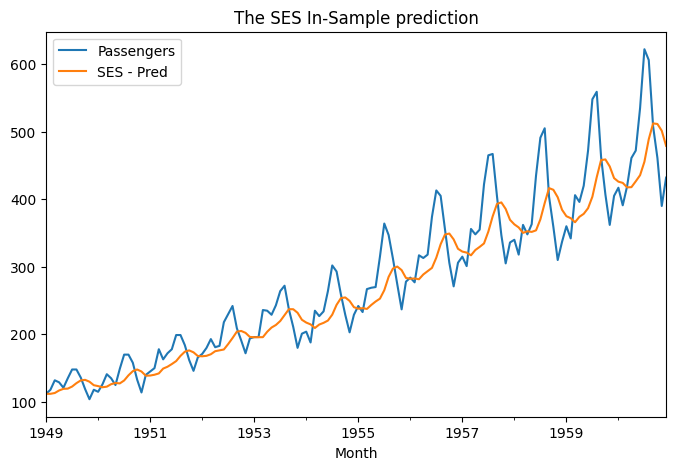

In [ ]:
passengers.plot()
plt.title("The SES In-Sample prediction");

Looks like the result that we've got with EWMA, right? <br>
Let's see how EWMA results are...

In [ ]:
passengers["EWMA"] = passengers["Passengers"].ewm(alpha=alpha, adjust=False).mean()

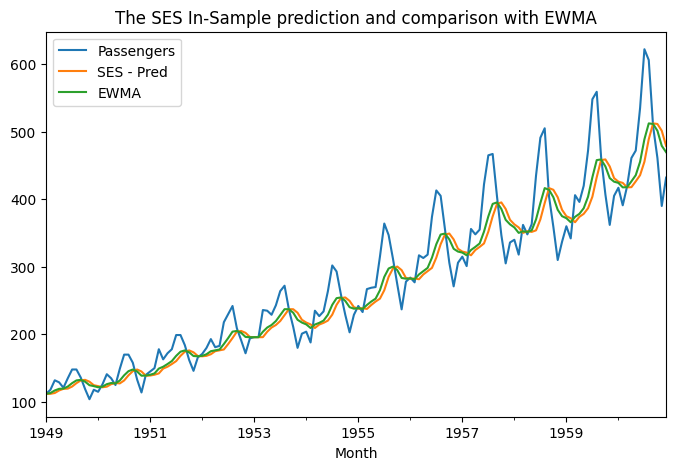

In [ ]:
passengers.plot()
plt.title("The SES In-Sample prediction and comparison with EWMA");

We can see that the results of **EWMA** and **SES** are exactly the same but SES is *one step lagging behind*.

In [ ]:
# Just the styling stuff... don't worry
def styling_specific_cell(df, rows, cols):
    df_styler = pd.DataFrame('', index=df.index, columns=df.columns)
    df_styler.iloc[rows, cols] = 'background-color: cyan'
    return df_styler

passengers.head().style.apply(styling_specific_cell, rows=[0, 1], cols=[1, 1], axis=None)

,Passengers,SES - Pred,EWMA
Month,,,
1949-01-01 00:00:00,112,112.000000,112.000000
1949-02-01 00:00:00,118,112.000000,113.200000
1949-03-01 00:00:00,132,113.200000,116.960000
1949-04-01 00:00:00,129,116.960000,119.368000
1949-05-01 00:00:00,121,119.368000,119.694400


See, there? The first 2 values in the SES column gets repeated. The reason that the author gives is that:

> *"We are treating this as the forecasting model rather than the EWMA model thus here the forecast for the **2nd** day will be the forecast for the **1st** day as before the day 2nd we only had day 1 and the exp mean of single number is the number itself. Then after the 2nd day, for the **3rd**, **4th** ... we will get the result as expected. Thus, it lags behind one day."*

In [ ]:
result.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

See that the `smoothing_level` is set to be `0.2` and is not changed.

### `2.` Forecast
Let's try 3 months ahead in time

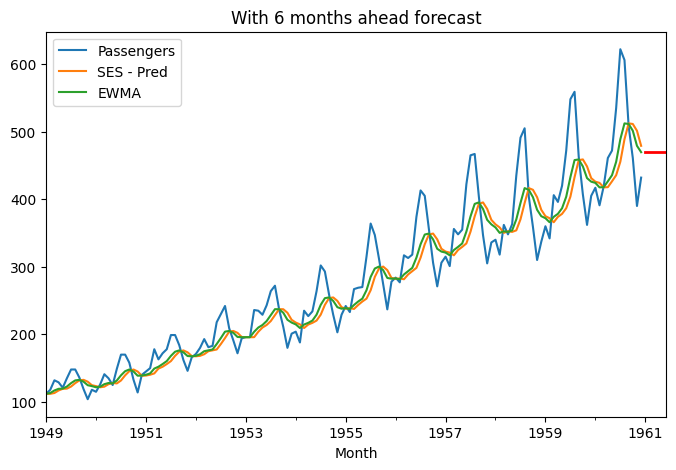

In [ ]:
passengers.plot()
result.forecast(6).plot(color='r', lw=2)
plt.title("With 6 months ahead forecast");

To view it better...

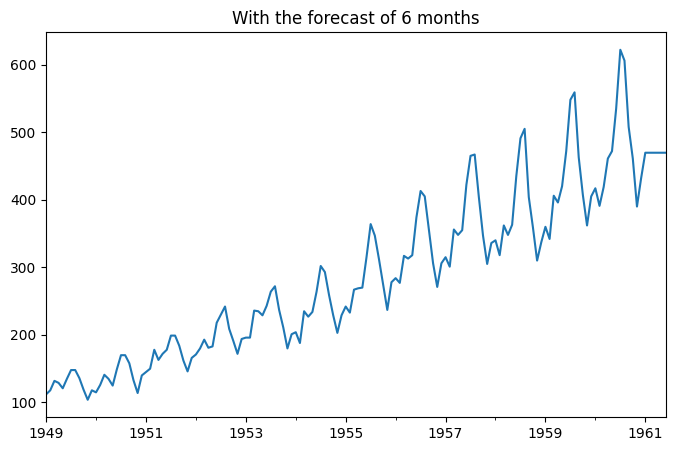

In [ ]:
forecast_passengers = pd.concat([passengers, pd.DataFrame(result.forecast(6), columns=["Passengers"])])
forecast_passengers["Passengers"].plot()
plt.title("With the forecast of 6 months");

Yay! Congratulations! 🎉 <br>
For the first time we have ***forecast*** (ed) something!!! Simple but the first step in the future!

### Taking this as the ML approach

See, till here we have taken the **manual** alpha and then based on that `0.2` we have forecast the new points. But, see the alpha might not be the proper one... let's see how it affects if **we would have taken `optimize=True`**.

In [ ]:
train = passengers["Passengers"].iloc[:-12] # Leaving last 12 months for testing
test = passengers["Passengers"].iloc[-12:] # Taking last 12 months for testing

In [ ]:
ses = SimpleExpSmoothing(train, "legacy-heuristic")

In [ ]:
# Note: We are not passing ALPHA
result = ses.fit()

In [ ]:
start =  passengers.index[0]
till =  passengers.index[-1]
print("START: ", start)
print("TILL: ", till)
passengers['SES - Pred'] = result.predict(start, till)

START:  1949-01-01 00:00:00
TILL:  1960-12-01 00:00:00


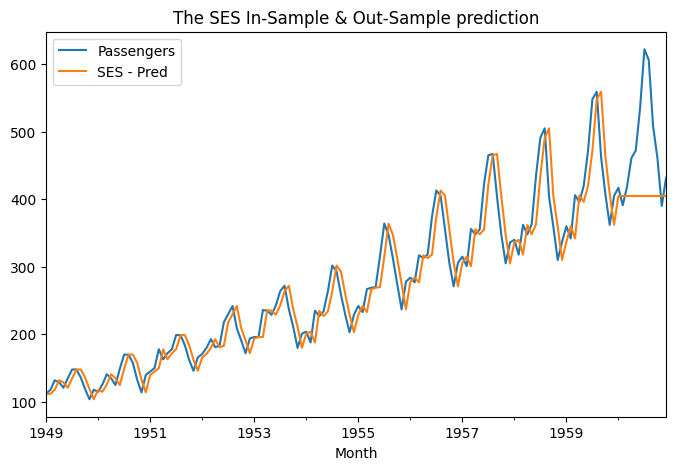

In [ ]:
passengers[["Passengers", "SES - Pred"]].plot()
plt.title("The SES In-Sample & Out-Sample prediction");

In [ ]:
result.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

See that the `smoothing_level` ie. alpha has been become `0.995`

In [ ]:
passengers.tail(15)

,Passengers,SES - Pred,EWMA
Month,,,
1959-10-01,407,463.479715,448.522825
1959-11-01,362,407.282399,431.218260
1959-12-01,405,362.226412,425.974608
1960-01-01,417,404.786132,424.179686
1960-02-01,391,404.786132,417.543749
1960-03-01,419,404.786132,417.834999
1960-04-01,461,404.786132,426.467999
1960-05-01,472,404.786132,435.574399
1960-06-01,535,404.786132,455.459520


Note there that **last 12 values** are being predicted there. And at this stage they are the same because we are not using any kind of seasonal component or anything else. Just fine!

## The Holt Model (Linear Version)

This is the **Hold Model**. At least the *starting* version of it. You know, you were used to *freak out* by reading this H O L T name? But after learning the nitty gritty of it, it is like a toy which was waiting for me to get un-wrapped.

Here, we are on the **Trend, But no Seasonality** type of situation unlike SES where there was *no trend* and *no seasonality* either.

### 🕶 Revision of SES
Recall that in SES, we used total of **`2`** models.

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t $$

#### 2️⃣ Smoothing Equation
# $$l_t = \alpha y_t + (1 - \alpha)l_{t - 1}$$

It was where, the 1️⃣ is the **actual** equation which will **give the final** result and 2️⃣ was the **underlying** equation which calculates the stuff. And that we called the level. **And that,** level ***is*** the **intercept**.

### Getting Started with Holt
Here, we have the same thing as SES just that it **has one more number to learn** which is **the trend**. This model will return the trend line which can go in any direction instead of simply the flat-horizontal simple line seen in SES.

And a line? Well... ***how to draw a freakin' line?***

Man! It is the same as **linear regression**!! As just we know how to calculate the **intercept** (level) now just we will need to learn about learning the **slope** (trend). That's it. And that will be our 3️⃣ equation.

Of course the equations will change slightly, but not much. Let's get to them step-by-step.

### Model in the component form

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t + (b_t \times h) $$

- Look at the equation, doesn't that look familiar? It is! It is the same as for the line in the linear regression: $\hat y = \beta_0 + (\beta_1 \times x_i)$.
- So, that's the little change in the things that we care about. As instead of the simple horizontal line, we now have the essence of the trend (overall).
- $l_t:$ represents the **level** (intercept)
- $b_t:$ represents the **trend** (slope)
- $h:$ represents `th` point in the future to predict 1, 2, 3, ...

#### 2️⃣ Level Equation
# $$l_t = \alpha y_t + (1 - \alpha)(l_{t - 1} + b_{t - 1})$$

- Just try to compare it with the previous SES version of the equation: $l_t = \alpha y_t + (1 - \alpha)l_{t - 1}$
- The thing is the same, the *later part* on the right side shows the smoothed version of the previous value, but **since** we are using more than 1 component in the model (which is a trend as well), we would now have to add that.
- And **note that** the $(l_{t - 1} + b_{t - 1})$ ***is actually*** $(l_{t - 1} + (b_{t - 1} \times 1))$ or say `h = 1` one point ahead in time — and since 1 has no meaning, we will remove it.

#### 3️⃣ Trend Equation
# $$b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$$

- We are **still using** the same form of the equation but with *slight* modification according to the model.
- The story of $(l_t - l_{t - 1})$
    - We find the slope generally with $\frac{l_t - l_{t - 1}}{1}$
    - $l_t:$ the value of current time
    - $l_{t - 1}:$ the value of previous time
    - Where the `1` in the denomenator represents the time frame — period
    - Just learning the slope in the gap of 1 day, 1 month... it is 1.
    - So that can be removed from the equation.
- We are taking the slope of single-single data into account to build the general trend.

## 👓 Holt in Action

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)

from statsmodels.tsa.holtwinters import Holt

In [ ]:
# Reading the same data
passengers = pd.read_csv("/content/airline_passengers.csv", index_col=0, parse_dates=True)
passengers.index.freq = "MS"

In [ ]:
train = passengers["Passengers"].iloc[:-12] # Leaving last 12 months for testing
test = passengers["Passengers"].iloc[-12:] # Taking last 12 months for testing

In [ ]:
# Building the model
holt = Holt(train, initialization_method="legacy-heuristic")

In [ ]:
holt

In [ ]:
# Note that we are nither giving the alpha nor the optimize
# as we want to get the minimized error
results = holt.fit()

In [ ]:
results.params

{'smoothing_level': 0.9987305298823471,
 'smoothing_trend': 0.0037588177898976497,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
start =  train.index[0]
till =  test.index[-1]
print("START: ", start)
print("TILL: ", till)
passengers["HOLT"] = results.predict(start, till)

START:  1949-01-01 00:00:00
TILL:  1960-12-01 00:00:00


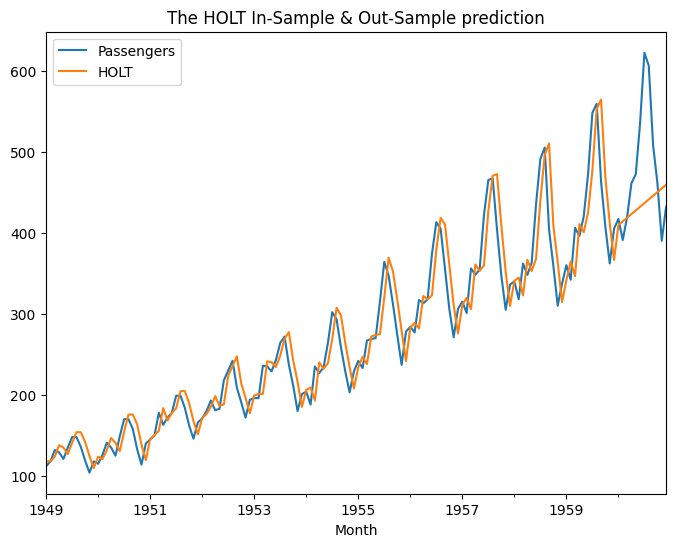

In [ ]:
passengers[["Passengers", "HOLT"]].plot()
plt.title("The HOLT In-Sample & Out-Sample prediction");

In [ ]:
results.params

{'smoothing_level': 0.9987305298823471,
 'smoothing_trend': 0.0037588177898976497,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

getting the same alpha($\alpha$) : `0.999` **&** also the beta($\beta$) : `0.004`.

And, the real numbers that will be used in will be:
- Level ($l_t$): `112.0`
- Trend ($b_t$): `6.0`

## 🏂 Holt Winters Model (Seasonal Version)


### 🤷‍♂️ But why Winters?
Now obviously you will get this doubt that *there can be a name like **holt** but, what about **winter** part? Does that show some kind of seasonality*? Hah, looking on the internet:

> Holt-Winter's Exponential Smoothing as named after its **two contributors**: Charles ***Holt*** and Peter ***Winter*** is one of the oldest time series analysis techniques which takes into account the trend and seasonality while doing the forecasting.

____

We started our journey of forecasting with:
- Simple MA
- Exponentially MA

Till now **no** forecasting was done.
- Simple Exponential Smoothing (The EWMA but repeated the last term `h` times) | **No Season, No Trend**
- Holt model (Added the *trend* in the calculation) | **No Season, Yes Trend**

And, now you *might* feel the *real* forecasting. Because it is:
- Holt Winter's model | **Yes Season, Yes Trend**.

### `2` Ways to Model The Problem
Meaning, there are **2** ways to put the **equation into an action**. Which equation? — The Main Forecast Equation $\hat y_{t + h | t} $.

1. Additive Method — Seasonal comp. is ***added***
    - y = level + trend + seasonal
2. Multiplicative Method — Seasonal comp. is ***multiplied***
    - y = (level + trend) * seasonal

Let's see how it works & how it affects the following equations.

#####

## ➕ Additive Method

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t + (b_t \times h) + s_{t + h - mk} $$

- Bro! The most of the equation is just the ***same*** as we have seen in the Holt's model!
- And the remaining is to be understood only! What an ease!
- Now, things are gonna get a **level forward**. Here, you will have to *look back in time for frequany `m` and for the latest time `k`.*

I know, I know things are looking foreign to you, but we will understand that a bit better*ly*. And for that we have a dedicated section for our $s_{t + h - mk}$ only. Let's ***de-mystify*** the seasonal term! We are coming winter! 😈

## $$ s_{t + h - mk} $$

- $t:$ It is the last known time of the real observation (hence we add $h$ to it to show the future time).

- $h:$ It is the steps to look forward in the future.


- $m:$ Defines the **period** of the seasonal component (you can say a cycle - frequency) which is: *a length of time for the signal to repeat itself*.
    - Thus, if we are looking at the sales data **each month** then the period will be... month? Nah! A year!
    - It is because the analysis goes on for a year (the overall) but they are based on the months.
    - Similarly, if I am looking at my BP data **each second** then the period will be... second? Come on! A day! Or Month!
    - See, the **pattern** or the season can only be seen when you **zoom out** in the time frame. So, it should be intuative.


- $k:$ It is a **number chosen** so that we can ***appropriately*** look back in the training data. To consider the **last** data to be considered.
    - I want to consider the last year's data for each month so... suppose today is **June - 22** and so for that I want my model to take the data from **June - 21** and hence I will take `k` as `1`.
    - But if I want the data 2 years back ie. consider **June - 20** so for that I would take `k` as `2`.
    - See that `k` is **multiplied** with the period term `m` which makes sense as we would get back `k` times on the units of defined as `m`.
    - If `m=12` & `k=1` → Go back 12 months (1 year back)
    - If `m=12` & `k=2` → Go back 24 months (2 years back)
    - If `m=24` & `k=3` → Go back 72 hours (3 days back)
    - **Obviously** the model doesn't know whether there are days, or hours ***it will just go back `mk` units back*** which could be months, days, hours etc.
    
    
- That's not it, mathameticians have given the ***formulae*** to get the value for `k`. Which is: $k = floor(\frac{h - 1}{m} + 1)$
    
> **NOTE**: That only the *level* and *trend* components are from the last known component and the *seasonal* component comes from the last period.

Huff... Amazing Amzing... Please read back **again** if you didn't get it. It is really easy.<br> Once again from my another book: માત્ર આ વાંચ, હાઉ દૂર થઇ જશે. Guerenteed 😉

#####

#### 2️⃣ Level Equation
# $$l_t = \alpha (y_t - s_{t - m}) + (1 - \alpha)(l_{t - 1} + b_{t - 1})$$

- Just a single change is here... just a single not more.
- That is: *Subtracting the seasonal component from the real value $y_t$*
- Why is that?
    - Because $y_t$ is ahead of other components, so it is removing some kind of cascading effect from the $y_t$.
    - This is *my weak* assumption behind *why*. It is not sure, but let's keep it that way.

Where, <br>
$l_t:$ Is the level that we know of, again we will see how to initialize and use it. <br>
$b_t:$ Is the trend, which like level is stored in the list and we then have to make things work. <br>
$s_{t - m}:$ Is the seasonal term, ***but*** this time it won't be used as level and trends are being used. We will use it by the **period `m`**. So, there will be the list of all the seasonal components like level & trend *but* the usage might differ.

#####

#### 3️⃣ Trend Equation
# $$b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$$

- This is the **same** equation that we have used in the previous holt's model
- To put it in the author's words:
> It's an EWMA of the trend, as measured by the difference in level.

#####

#### 4️⃣ Seasonal Equation
# $$s_t = \gamma(y_t - l_{t-1} - b_{t - 1}) + (1 - \gamma)s_{t - m}$$

- Looks **strange**? Nah! This might be simpler then the both above! *(I know: exaggeration)*.
- You can see multiple *subtractions* in the first bracket $(y_t - l_{t-1} - b_{t - 1})$
    - That simply is to get the **current** season from the data
    - How to get that? From the equation: $\hat y_{t + h | t} = l_t + (b_t \times h) + s_{t + h - mk} $
    - For a moment, **let's remove** the signs of time: $y = l + (b \times h) + s $
    - So to get the seasonal part $s$ we would: $s = y - l - (b \times h) $
    - And... for only one time, `h` will be `1` — Hence: $s = y - l - b $   
- And that's what we have in the above equation!

> **NOTE**: That in the second part of this equation we are having $(1 - \gamma)s_{t-m}$ and see that the $s_{t-m}$ is from the ***previous*** period.

#

## ❌ Multiplicative Method

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = (l_t + (b_t \times h)) \times s_{t + h - mk} $$

- Just replaced `+` with `x` and nothing much...

#####

#### 2️⃣ Level Equation
# $$l_t = \alpha \frac{y_t}{s_{t - m}} + (1 - \alpha)(l_{t - 1} + b_{t - 1})$$

- That small change only... from $(y_t - s_{t - m})$ to → $\left(\frac{y_t}{s_{t - m}}\right)$
- Why? Because see it in as some kind of the *effect of the equation change*.
- We have changed the equation from additive to multiplicative, thus the seasonal term will go in the denominator part.

#####

#### 3️⃣ Trend Equation
# $$b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$$

- Haash, it is the same...
- But why isn't it being affected?
- It ***is*** being affected, but as *it is based on the difference of the leveles* and the *levels themselves* are affected by the season in the 2️⃣ equation, there is **no need** to give the ***double effect*** here.
- At the EOD, we are just finding the slope.

#####

#### 4️⃣ Seasonal Equation
# $$s_t = \gamma\left(\frac{y_t}{l_{t-1} - b_{t - 1}}\right) + (1 - \gamma)s_{t - m}$$

- The same thing, based on the equation.
- The the $s$ is multiplied, so the rest should be divided here!

#####

### 🤨 Do `add` vs `multiply` make difference?

In our example *(airline passengers)* we should use the *multiplicative* method as the amplitude of the number of the passengers get larger over the time and multiplication will give the better satisfaction to that condition.




But still we will **play around** with the data and see what is reality.

### 👨‍💻 The Code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

Getting confused? Why `ExponentialSmoothing`? <BR>
For that, let's revise what we have used till now.
    
```python
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # SES
from statsmodels.tsa.holtwinters import Holt                 # Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt-Winter
```

And, this is how it is.

In [ ]:
df = pd.read_csv("/content/airline_passengers.csv", index_col=0, parse_dates=True)

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.index.freq = "MS"

In [ ]:
# Simply storing the training and testing indices for later use
train_idx = df.index[:-12]
test_idx = df.index[-12:]

In [ ]:
# Making the different sets so for convinience later
train = df.loc[train_idx]
test = df.loc[test_idx]

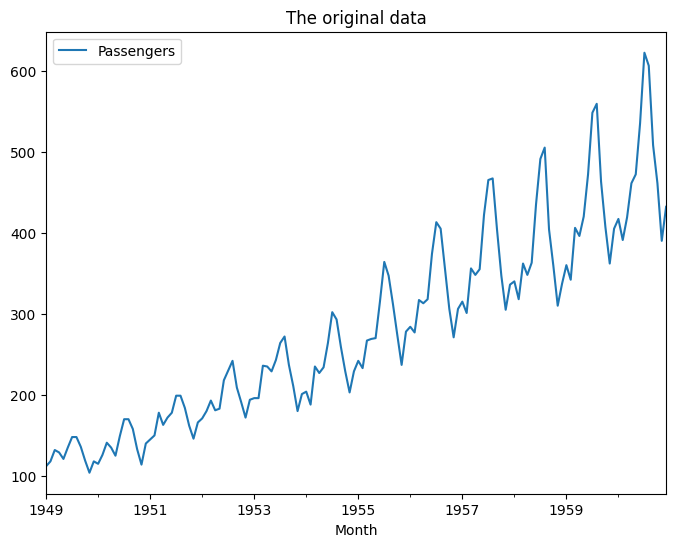

In [ ]:
df.plot()
plt.title("The original data");

In [ ]:
# See, we are `adding` the seasonal term
model = ExponentialSmoothing(train,
                    trend="add", seasonal="add",
                    initialization_method="legacy-heuristic", seasonal_periods=12)
model

In [ ]:
result = model.fit()

In [ ]:
result.params

{'smoothing_level': 0.251844132082723,
 'smoothing_trend': 0.0390401802310272,
 'smoothing_seasonal': 0.7481532665335077,
 'damping_trend': nan,
 'initial_level': 225.8181818181818,
 'initial_trend': 1.0833333333333333,
 'initial_seasons': array([-113.81818182, -107.81818182,  -93.81818182,  -96.81818182,
        -104.81818182,  -90.81818182,  -77.81818182,  -77.81818182,
         -89.81818182, -106.81818182, -121.81818182, -107.81818182]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
df.loc[train_idx, "HoltWinters"] = result.fittedvalues
df.loc[test_idx, "HoltWinters"] = result.forecast(12)

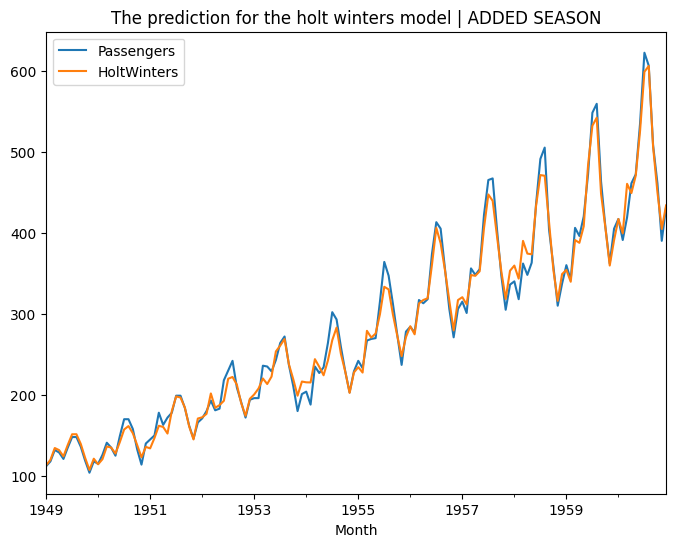

In [ ]:
df.plot()
plt.title("The prediction for the holt winters model | ADDED SEASON");

Now we are getting somewhere!!!!

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("Train Error: ", mean_squared_error(train, result.fittedvalues, squared=False))
print("Test Error: ", mean_squared_error(test, result.forecast(12), squared=False))

Train Error:  11.853000976828765
Test Error:  15.543003084126884


The test error, meaning the forecast error is a bit high...

Let's now check, with the `multiplicative` method.

In [ ]:
model = ExponentialSmoothing(train,
                    trend="add", seasonal="mul",
                    initialization_method="legacy-heuristic",
                    seasonal_periods=12)

result = model.fit()
df.loc[train_idx, "HoltWinters"] = result.fittedvalues
df.loc[test_idx, "HoltWinters"] = result.forecast(12)

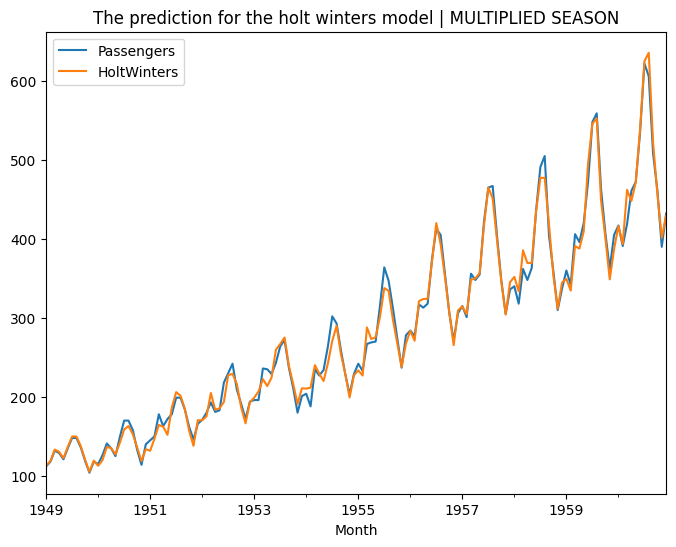

In [ ]:
df.plot()
plt.title("The prediction for the holt winters model | MULTIPLIED SEASON");

In [ ]:
print("Train Error: ", mean_squared_error(train, result.fittedvalues, squared=False))
print("Test Error: ", mean_squared_error(test, result.forecast(12), squared=False))

Train Error:  10.153934838980392
Test Error:  16.535212108255575


> Thing to note that, we are **no longer** lagging behind! Meaning, the predicted values are **not shifted** behind!

In [ ]:
result.params

{'smoothing_level': 0.31880474811683734,
 'smoothing_trend': 0.04137712972152417,
 'smoothing_seasonal': 0.672160916340147,
 'damping_trend': nan,
 'initial_level': 225.8181818181818,
 'initial_trend': 1.0833333333333333,
 'initial_seasons': array([0.49597424, 0.52254428, 0.58454106, 0.57125604, 0.53582931,
        0.59782609, 0.65539452, 0.65539452, 0.60225443, 0.52697262,
        0.4605475 , 0.52254428]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Exercise Set 1️⃣

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from itertools import product

In [ ]:
# Using skip rows because we have used the `names` paramer to rename to "sales"

df = pd.read_csv("/content/Dates.csv",
                index_col=0,
                parse_dates=True,
                names=["Sales"],
                skiprows=1, # skip rows will skip the header being read as data.
                skipfooter=2, # skip footer will skip the last 2 rows as they contain NaN
                engine='python')

df.index.freq = "MS"

In [ ]:
df.head()

,Sales
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [ ]:
df.shape

(105, 1)

**Here**, we are only gonna use the built-in method. Which will make the stuff much smoother and streamlined. Let's start with the data `viz`!

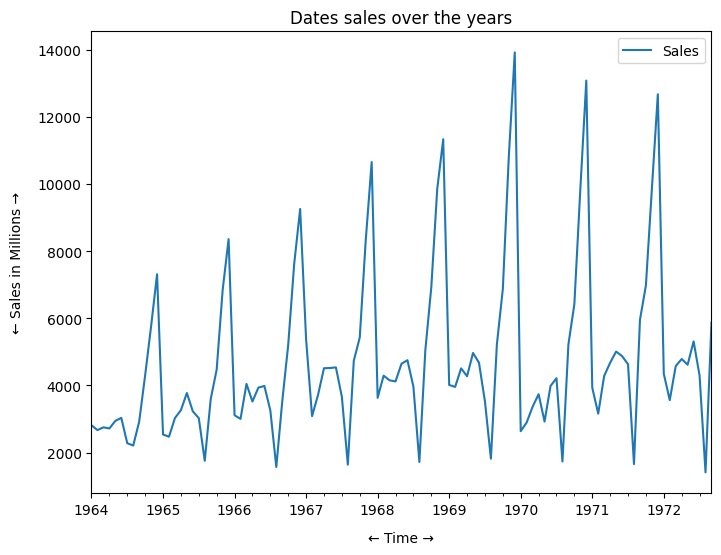

In [ ]:
df.plot()
plt.title("Dates sales over the years")
plt.xlabel("← Time →", labelpad=10)
plt.ylabel("← Sales in Millions →", labelpad=10);

Clearly it is a strong suggestion of a seasonal data. There are **regular** spikes in some month per year.
- It is observed that the sales kept increasing over the years till 1969 having a stopn **peak**
- After 1970, it looks it is falling.
- **It will be interesting** to see how it behaves after 1972 in our forecast period.

—

Again, I will be using the ***GridSearch*** here to find the best possible parameters for the testing. Once I am happy with that... I will use those settings to train it on **whole dataset** and then will forecast in the future.

Since, this data is showing the pattern in the **yearly** setting, I will be keeping it `12` as the period.

In [ ]:
h = 12
offset = 1
def walkforward(
    trend_type,
    season_type,
    init_method,
    use_boxcox,
    debug=False):

    """
    This function should be called either individually or from the
    grid search (the manual one).

    What is does is, it will fit and validate the model sotring the
    errors of each fold in the errors list.

    Returns the mean of errors.
    """
    errors = []
    for th, idx in enumerate(range(70, len(df) + 1 - h, offset)):
        # Two simple parts
        train = df.iloc[:idx]
        test = df.iloc[idx:idx+h]

        # The model initialization of the parameters
        model = ExponentialSmoothing(train,
                                    trend=trend_type,
                                    seasonal=season_type,
                                    initialization_method=init_method,
                                    use_boxcox=use_boxcox,
                                    seasonal_periods=12)
        # Learning
        result = model.fit()

        # Getting the forecast results
        forecast = result.forecast(h)

        # Storing the error
        error = mean_absolute_percentage_error(test, forecast)
        errors.append(error)

    if debug:
        print("Total", th + 1, "steps!")

    return np.mean(errors) * 100

In [ ]:
walkforward("add", "mul", "estimated", True, True)

Total 24 steps!


17.28629939565228

So, this simple version does `17%` error in the data. Let's get things running for the GridSearch.

### Defining the list of the parameters

In [ ]:
list_of_parameters = \
[
    ["add", "mul"],
    ["add", "mul"],
    ["estimated", "heuristic", "legacy-heuristic"],
    [True, False]
]

In [ ]:
# Total possible combinations
2 * 2 * 3 * 2

24

In [ ]:
def gridSearch(list_of_parameters):
    best_score = float('inf') # NEW!
    best_hyperparams = None

    for th, parameters in enumerate(product(*list_of_parameters)):
        print(th + 1, "/24", sep="")
        score = walkforward(*parameters)

        if score < best_score:
            best_score = score
            best_hyperparams = parameters

    return best_score, best_hyperparams

In [ ]:
best_score, best_hyper = gridSearch(list_of_parameters)

In [ ]:
best_score

13.913857466796745

In [ ]:
best_hyper

('add', 'mul', 'legacy-heuristic', False)

### Simple Train and Test... see what happens

In [ ]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [ ]:
model = ExponentialSmoothing(train,
                            trend="add",
                            seasonal="mul",
                            initialization_method="legacy-heuristic",
                            use_boxcox=False)

In [ ]:
result = model.fit()

In [ ]:
forecast = result.forecast(12)
forecast = pd.Series(forecast, index=test.index)

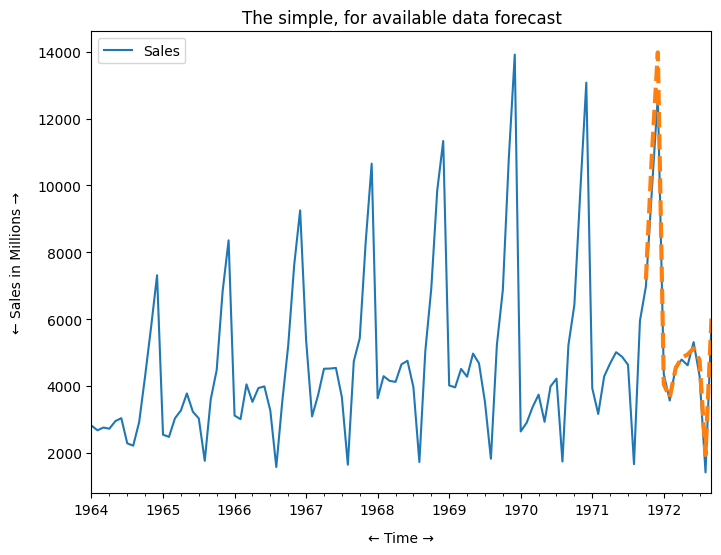

In [ ]:
df.plot()
forecast.plot(ls="--", lw=3)
plt.title("The simple, for available data forecast")
plt.xlabel("← Time →", labelpad=10)
plt.ylabel("← Sales in Millions →", labelpad=10);

### 📈 A Real Forecast

In [ ]:
model = ExponentialSmoothing(df,
                            trend="add",
                            seasonal="mul",
                            initialization_method="legacy-heuristic",
                            use_boxcox=False)

result = model.fit()

In [ ]:
forecast = result.forecast(24)

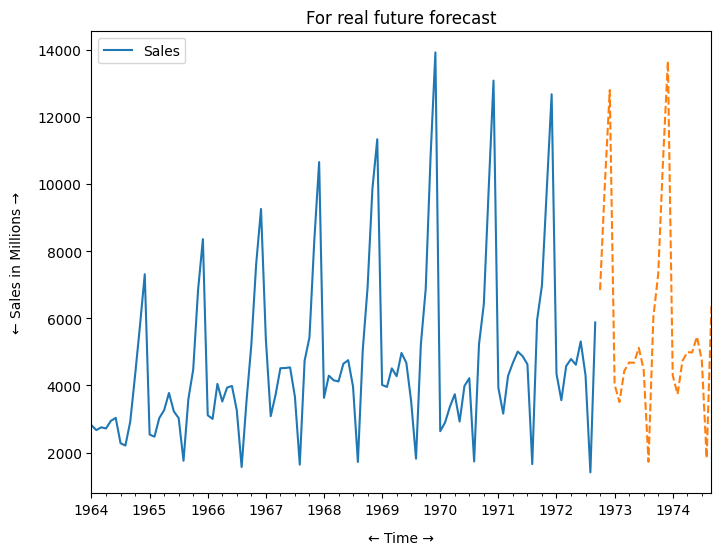

In [ ]:
df.plot()
forecast.plot(ls="--")
plt.title("For real future forecast")
plt.xlabel("← Time →", labelpad=10)
plt.ylabel("← Sales in Millions →", labelpad=10);

Only for `2` years ahead. **LOOKS FASCINATING!** Let's go for more!

In [ ]:
forecast = result.forecast(120) # 10 years

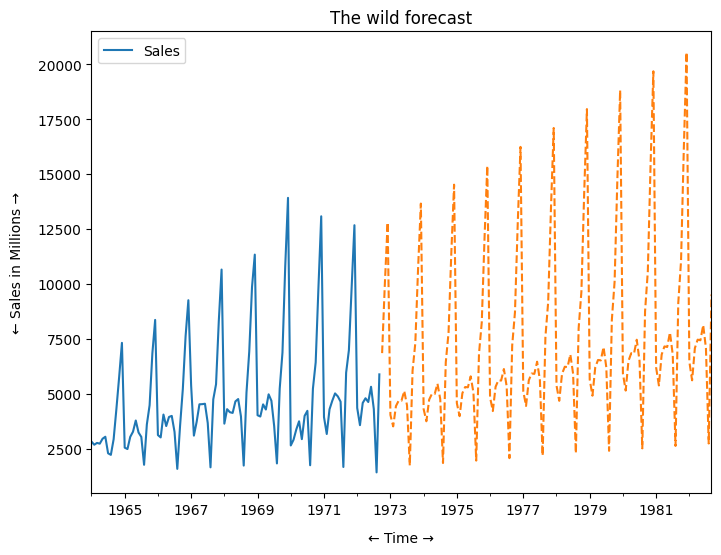

In [ ]:
df.plot()
forecast.plot(ls="--")
plt.title("The wild forecast")
plt.xlabel("← Time →", labelpad=10)
plt.ylabel("← Sales in Millions →", labelpad=10);

Bruh! It is increasing... let's try `add` as season!

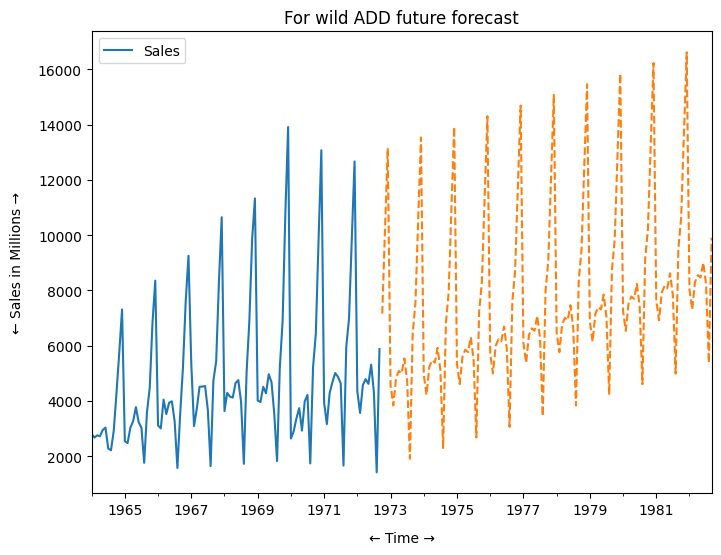

In [ ]:
model = ExponentialSmoothing(df,
                            trend="add",
                            seasonal="add",
                            initialization_method="legacy-heuristic",
                            use_boxcox=False)

result = model.fit()
forecast = result.forecast(120)

df.plot()
forecast.plot(ls="--")
plt.title("For wild ADD future forecast")
plt.xlabel("← Time →", labelpad=10)
plt.ylabel("← Sales in Millions →", labelpad=10);

Alright, the settings received by the GridSearch looks **better**!

## Exercise Set 2️⃣

In [ ]:
df = pd.read_csv("/content/sp500_close.csv",
                 index_col=0,
                 parse_dates=True)

In [ ]:
df["GOOGL"].isna().sum()

567

These are the holiday values, thus we can drop them.

In [ ]:
google = df.GOOGL.dropna()
google.head()

2013-02-08    393.0777
2013-02-11    391.6012
2013-02-12    390.7403
2013-02-13    391.8214
2013-02-14    394.3039
Name: GOOGL, dtype: float64

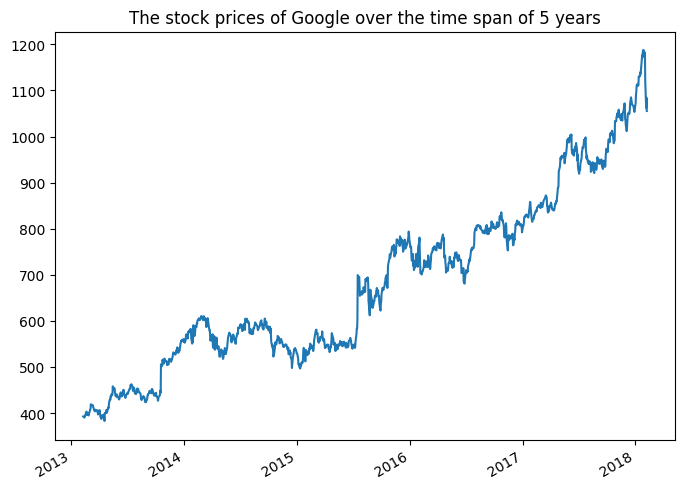

In [ ]:
google.plot()
plt.title("The stock prices of Google over the time span of 5 years");

**Eye-ball analysis**:
- Right from here, we can see that Google is doing amazing job over the years.
- The trend is obviously on the positive side.
- After the mid 2015 it has shown constant positive growth.

### 🧠 Recall
Recall from the previous talks about the **random walk**. The stock prices mostly tend to follow a **random walk**. So, the ***best estimate for the forecast values is — the Naive forecast***.

Meaning, if we use some *sophisticated* models then that *might* be proved as a ***bad*** forecast. So, the moral of the story is that, we will have to check `4` techniques here:
1. Naive forecast *(copying last valeus)*
2. SES *(copying the values but learning the level)*
3. Holt's model *(no season, yes trend)*
4. Holt Winter's model *(yes season, yes trend)*

Here, we will check the `MAE` and `MAPE` score to evaluate the fit. Let's see how that goes.

> And, while doing the forecasting... did you get ***a small doubt***? That the transformations that we have learnt before, why aren't they being used here?

The answer is: **They do**! But the model does it internally. <br>
Meaning, *box-cox (which involves log and power)* is done internally but the model! With the `use_boxcox` parameter. So, no need to do them manually.

___

### 🤖 Training & Forecasting

In [ ]:
# The train and test split
train = google.iloc[:-31]
test = google.iloc[-31:]

#### `1.` Simple Forecasting (Naive)

In [ ]:
naive_forecast = pd.Series(np.repeat(train.iloc[-1], 31),
                           index=test.index)

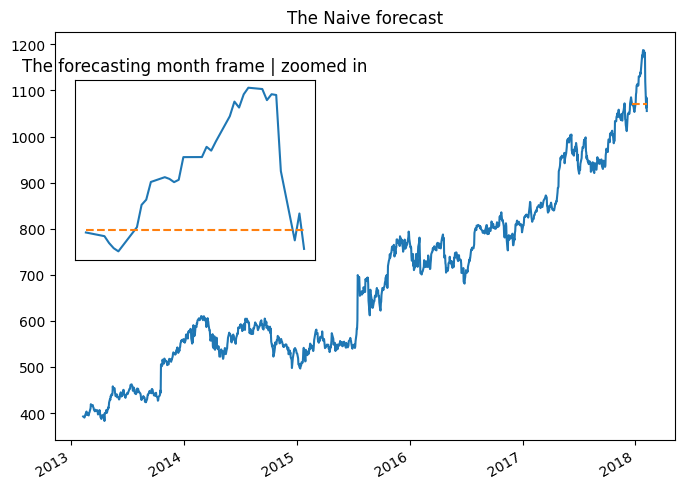

In [ ]:
main_axes = plt.axes()
small_axes = plt.axes([.15,.5,.3,.3])

google.plot(ax=main_axes)
naive_forecast.plot(ax=main_axes, ls='dashed')

google.iloc[-31:].plot(ax=small_axes)
naive_forecast.plot(ax=small_axes, ls='dashed')


main_axes.set(title="The Naive forecast");
small_axes.set(yticks=[], xticks=[],
               title="The forecasting month frame | zoomed in");

In [ ]:
# Check the error
def get_metrics(true, forecast):
    print("MAPE:", round(mean_absolute_percentage_error(true, forecast) * 100, 4), "%")
    print("MAE:", mean_absolute_error(true, forecast))
    print("RMSE:", mean_squared_error(true, forecast, squared=False))

In [ ]:
get_metrics(test, naive_forecast)

MAPE: 4.7237 %
MAE: 54.38677419354844
RMSE: 67.10660048782286


#### `2.` Simple Exponential Smoothing
Here: *no trend, no seasonality*

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
SES_model = SimpleExpSmoothing(train,
                               initialization_method='legacy-heuristic')

result = SES_model.fit()
SES_forecast = result.forecast(31).to_numpy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
SES_forecast = pd.Series(SES_forecast,
                           index=test.index)

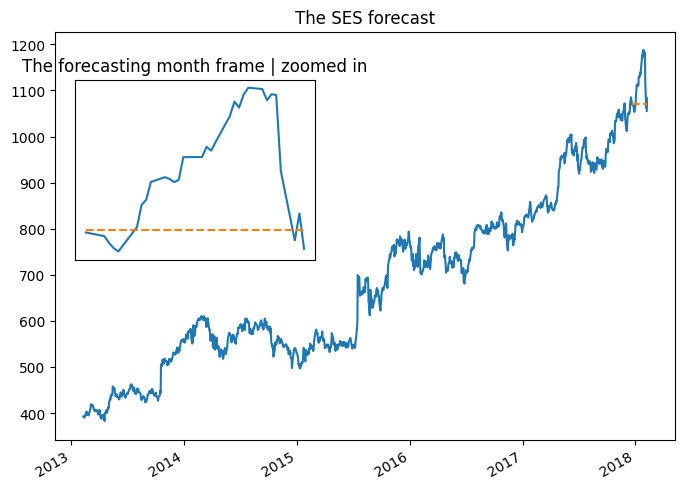

In [ ]:
main_axes = plt.axes()
small_axes = plt.axes([.15,.5,.3,.3])

google.plot(ax=main_axes)
SES_forecast.plot(ax=main_axes, ls='dashed')

google.iloc[-31:].plot(ax=small_axes)
SES_forecast.plot(ax=small_axes, ls='dashed')


main_axes.set(title="The SES forecast");
small_axes.set(yticks=[], xticks=[],
               title="The forecasting month frame | zoomed in");

In [ ]:
get_metrics(test, SES_forecast)

MAPE: 4.7237 %
MAE: 54.38677417140346
RMSE: 67.10660045796376


Just the same! *(ignoring the last changes in the fractions)*

#### `3.` Holt's Model
Here: *yes trend, no seasonality*

In [ ]:
from statsmodels.tsa.holtwinters import Holt

In [ ]:
Holt_model = Holt(train,
                  initialization_method='legacy-heuristic')

result = Holt_model.fit()
Holt_forecast = result.forecast(31).to_numpy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
Holt_forecast = pd.Series(Holt_forecast,
                          index=test.index)

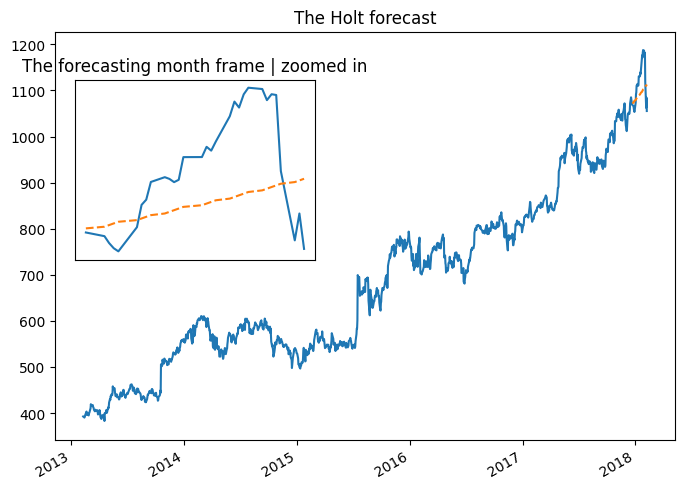

In [ ]:
main_axes = plt.axes()
small_axes = plt.axes([.15,.5,.3,.3])

google.plot(ax=main_axes)
Holt_forecast.plot(ax=main_axes, ls='dashed')

google.iloc[-31:].plot(ax=small_axes)
Holt_forecast.plot(ax=small_axes, ls='dashed')


main_axes.set(title="The Holt forecast");
small_axes.set(yticks=[], xticks=[],
               title="The forecasting month frame | zoomed in");

In [ ]:
get_metrics(test, Holt_forecast)

MAPE: 3.6218 %
MAE: 41.36410858814369
RMSE: 48.938245593641


We are doing better! The error is shrinked to **$42.32** *(considering MAE)*

In [ ]:
# With `exponential=True` we are doing even better!

Holt_model = Holt(train,
                  initialization_method='legacy-heuristic',
                  exponential=True)

result = Holt_model.fit()
Holt_forecast = result.forecast(31).to_numpy()

Holt_forecast = pd.Series(Holt_forecast,
                          index=test.index)

get_metrics(test, Holt_forecast)

MAPE: 3.5176 %
MAE: 40.119519367734014
RMSE: 47.38728760501763


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#### `4.` Holt Winter's Model
Here: *yes trend, yes seasonality*

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
HW_model = ExponentialSmoothing(train,
                                initialization_method='legacy-heuristic',
                                trend="add",
                                seasonal="mul",
                                seasonal_periods=31)

result = HW_model.fit()
HW_forecast = result.forecast(31).to_numpy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
HW_forecast = pd.Series(HW_forecast,
                          index=test.index)

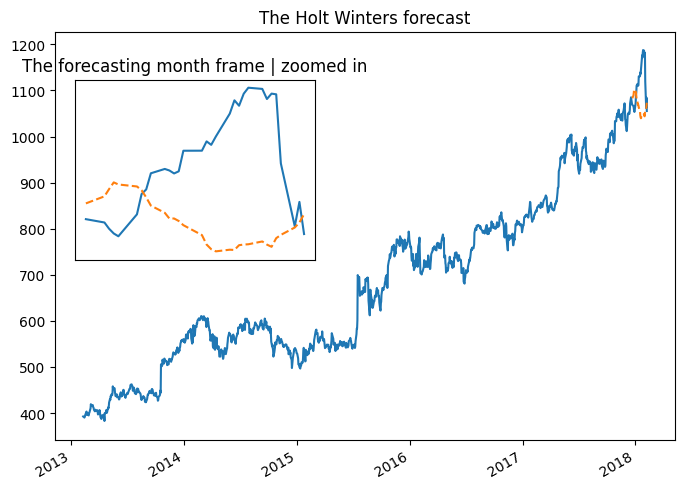

In [ ]:
main_axes = plt.axes()
small_axes = plt.axes([.15,.5,.3,.3])

google.plot(ax=main_axes)
HW_forecast.plot(ax=main_axes, ls='dashed')

google.iloc[-31:].plot(ax=small_axes)
HW_forecast.plot(ax=small_axes, ls='dashed')


main_axes.set(title="The Holt Winters forecast");
small_axes.set(yticks=[], xticks=[],
               title="The forecasting month frame | zoomed in");

In [ ]:
get_metrics(test, Holt_forecast)

MAPE: 3.5176 %
MAE: 40.119519367734014
RMSE: 47.38728760501763


It is the **best so far**. <br>
But still I want to try other parameters. So we will use our GridSearch!

In [ ]:
list_of_parameters = \
[
    ["add", "mul", None],
    ["add", "mul", None],
    ["estimated", "heuristic", "legacy-heuristic"],
    [True, False],
    [7, 31, 90, 180, 365]
    # W, M, 3M,  6M,  1Y
]

In [ ]:
# Total combinations!
3 * 3 * 3 * 2 * 5

270

We are not using the WalkForward here, it would take so much time.

In [ ]:
def gridSearch(list_of_parameters):
    best_score = float('inf') # NEW!
    best_hyperparams = None

    for th, parameters in enumerate(product(*list_of_parameters)):
        print(th + 1, "/270", sep="", end="\t")

        trend_type, season_type, init_method, use_boxcox, h = parameters
        model = ExponentialSmoothing(train,
                                    trend=trend_type,
                                    seasonal=season_type,
                                    initialization_method=init_method,
                                    use_boxcox=use_boxcox,
                                    seasonal_periods=h)
        # Learning
        result = model.fit()

        # Getting the forecast results
        forecast = result.forecast(31)

        # Storing the error
        score = mean_absolute_error(test, forecast) # changed to MAE from MAPE

        if score < best_score:
            best_score = score
            best_hyperparams = parameters

    return best_score, best_hyperparams

In [ ]:
best_score, best_hypers = gridSearch(list_of_parameters)

In [ ]:
best_score

18.731361952570648

In [ ]:
best_hypers

('add', 'add', 'heuristic', True, 365)

I would still doubt the `h = 365`.  Let's increase it to 730 *(2 years)* and see if that makes difference.

In [ ]:
final_model = ExponentialSmoothing(train,
                                    trend=None,
                                    seasonal='add',
                                    initialization_method='legacy-heuristic',
                                    use_boxcox=True,
                                    seasonal_periods=730)
# Learning
result = final_model.fit()
forecast = result.forecast(31)
mean_absolute_error(test, forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


31.11941429657255

Nah! It increases! So, `365` is better!

In [ ]:
final_model = ExponentialSmoothing(train,
                                    trend=None,
                                    seasonal='add',
                                    initialization_method='legacy-heuristic',
                                    use_boxcox=True,
                                    seasonal_periods=365)
# Learning
result = final_model.fit()
final_forecast = result.forecast(31).to_numpy()
final_forecast = pd.Series(final_forecast,
                          index=test.index)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


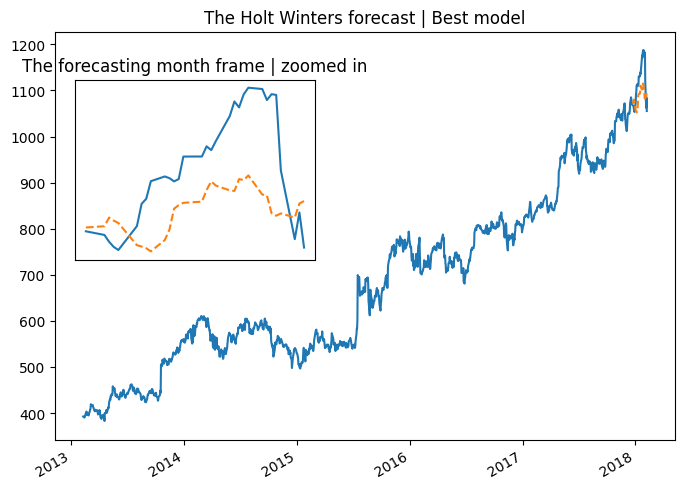

In [ ]:
main_axes = plt.axes()
small_axes = plt.axes([.15,.5,.3,.3])

google.plot(ax=main_axes)
final_forecast.plot(ax=main_axes, ls='dashed')

google.iloc[-31:].plot(ax=small_axes)
final_forecast.plot(ax=small_axes, ls='dashed')


main_axes.set(title="The Holt Winters forecast | Best model");
small_axes.set(yticks=[], xticks=[],
               title="The forecasting month frame | zoomed in");

In [ ]:
get_metrics(test, final_forecast)

MAPE: 3.784 %
MAE: 43.21830215064532
RMSE: 50.58947259061299


### 😍 How amazing!

Let's make it to the ***future***!

In [ ]:
final_model = ExponentialSmoothing(google, # on whole data
                                    trend=None,
                                    seasonal='add',
                                    initialization_method='legacy-heuristic',
                                    use_boxcox=True,
                                    seasonal_periods=365)
# Learning
result = final_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
final_forecast = result.forecast(365).to_numpy()
final_forecast = pd.Series(final_forecast,
                          index=pd.date_range(google.index[-1], periods=365))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


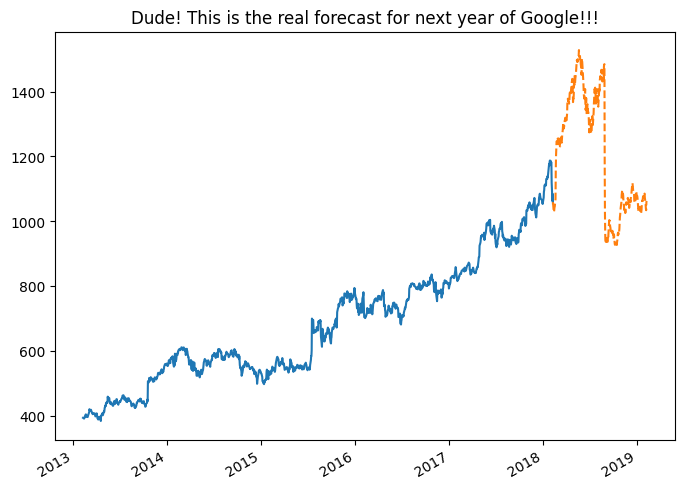

In [ ]:
google.plot()
final_forecast.plot(ls='dashed')
plt.title("Dude! This is the real forecast for next year of Google!!!");

In [ ]:
final_forecast = result.forecast(365 * 3).to_numpy()
final_forecast = pd.Series(final_forecast,
                          index=pd.date_range(google.index[-1], periods=365 * 3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


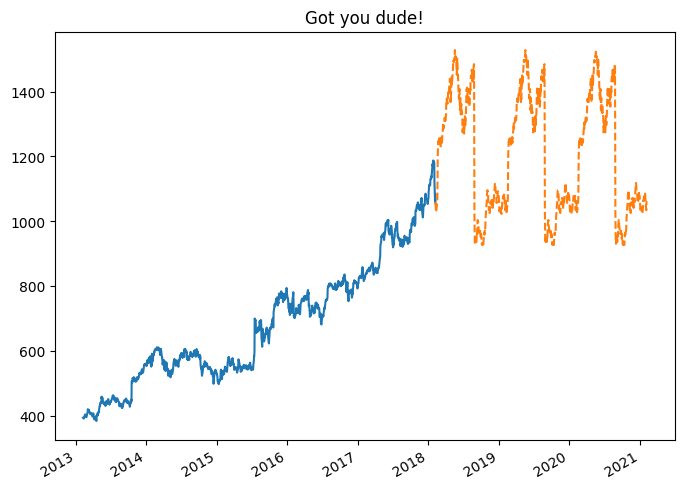

In [ ]:
google.plot()
final_forecast.plot(ls='dashed')
plt.title("Got you dude!");

Thats's it